<a href="https://colab.research.google.com/github/nihel-sliti/Python/blob/main/lambdas_closures_and_collection_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A lambda function**
 A lambda function is a function without a name (you can also call it an anonymous function). Of course, such a statement immediately raises the question: how do you use anything that cannot be identified?

Fortunately, it's not a problem, as you can name such a function if you really need, but, in fact, in many cases the lambda function can exist and work while remaining fully incognito.

In [ ]:
two = lambda: 2
sqr = lambda x: x * x
pwr = lambda x, y: x ** y

for a in range(-2, 3):
    print(sqr(a), end=" ")
    print(pwr(a, two()))



4 4
1 1
0 0
1 1
4 4


=>Let's analzye it:

  1-the first lambda is an anonymous parameterless function that always returns 2. As we've assigned it to a variable named two, we can say that the function is not anonymous anymore, and we can use the name to invoke it.

  2-the second one is a one-parameter anonymous function that returns the value of its squared argument. We've named it as such, too.

  3-the third lambda takes two parameters and returns the value of the first one raised to the power of the second one. The name of the variable which carries the lambda speaks for itself. We don't use pow to avoid confusion with the built-in function of the same name and the same purpose.

NOTE:

---
 the Style Guide for Python Code, recommends that lambdas should not be
assigned to variables, but rather they should be defined as functions.


```
  #Recommended:
def f(x): return 3*x
  #Not recommended:
f = lambda x: 3*x
```



**The most interesting part of using lambdas appears when you can use them in their pure form - as anonymous parts of code intended to evaluate a result.**

Let us show you another place where lambdas can be useful. We'll start with a description of ***map()***, a built-in Python function. Its name isn't too descriptive, its idea is simple, and the function itself is really usable.




# **Lambdas and the map() function**

In [ ]:
#build the list_1 with values from 0 to 4
list_1 = [x for x in range(5)]
#next, use map along with the first lambda to
#create a new list in which all elements have been evaluated as 2 raised to the power taken from the corresponding element from list_1
list_2 = list(map(lambda x: 2 ** x, list_1))
print(list_2)
#in the next step, use the map() function again to make use of the generator it returns and to directly print all the values it delivers
# as you can see, we've engaged the second lambda here - it just squares each element from list_2.
for x in map(lambda x: x * x, list_2):
    print(x, end=' ')
print()


[1, 2, 4, 8, 16]
1 4 16 64 256 


# **Lambdas and the filter() function**

In [ ]:
#The filter(fun, list) function creates a copy of those list elements,
# which cause the fun function to return True. The function's result is a generator providing the new list content element by element.
short_list = [1, "Python", -1, "Monty"]
new_list = list(filter(lambda s: isinstance(s, str), short_list))
print(new_list)



['Python', 'Monty']


# **Lambdas and the sorted() function**

In [ ]:
# Exemple de liste de tuples
ma_liste = [(1, 2), (3, 1), (5, 0), (4, 2)]

# Trier la liste en fonction du deuxième élément de chaque tuple
ma_liste_triee = sorted(ma_liste, key=lambda x: x[1])

print(ma_liste_triee)


[(5, 0), (3, 1), (1, 2), (4, 2)]


In [ ]:
mon_dictionnaire = {'c': 3, 'a': 1, 'b': 2}

# Trier le dictionnaire par valeur
dictionnaire_trie = sorted(mon_dictionnaire.items(), key=lambda x: x[1])

print(dictionnaire_trie)  # Résultat sous forme de liste de tuples


[('a', 1), ('b', 2), ('c', 3)]


# **Lambdas and the reduce() function**

In [ ]:
from functools import reduce

# Une liste d'entiers
ma_liste = [1, 2, 3, 4, 5]

# Utilisation de reduce avec une expression lambda pour additionner les éléments
resultat = reduce(lambda x, y: x + y, ma_liste)

print(resultat)  # Affiche la somme des éléments de la liste


15


# **Closures**

 A closure is a technique which allows the storing of values in spite of the fact that the context in which they have been created does not exist anymore.

In [ ]:
def make_closure(par):
    loc = par

    def power(p):
        return p ** loc
    return power


fsqr = make_closure(2)
fcub = make_closure(3)

for i in range(5):
    print(i, fsqr(i), fcub(i))


0 0 0
1 1 1
2 4 8
3 9 27
4 16 64


Now look at the code in the editor. It is fully possible to declare a closure equipped with an arbitrary number of parameters, e.g., one, just like the power() function.

This means that the closure not only makes use of the frozen environment, but it can also modify its behavior by using values taken from the outside.

This example shows one more interesting circumstance - you can create as many closures as you want using one and the same piece of code. This is done with a function named make_closure(). Note:

the first closure obtained from make_closure() defines a tool squaring its argument;
the second one is designed to cube the argument.


# **Generators**

A Python generator is a piece of specialized code able to produce a series of values, and to control the iteration process. This is why generators are very often called iterators, and although some may find a very subtle distinction between these two, we'll treat them as one.

In [ ]:
# ----------------
# -- Generators --
# ----------------
# [1] Generator is a Function With "yield" Keyword Instead of "return"
# [2] It Support Iteration and Return Generator Iterator By Calling "yield"
# [3] Generator Function Can Have one or More "yield"
# [4] By Using next() It Resume From Where It Called "yield" Not From Begining
# [5] When Called, Its Not Start Automatically, Its Only Give You The Control
# -----------------------------------------------------------------

def myGenerator():
  yield 1
  yield 2
  yield 3
  yield 4

myGen = myGenerator()

print(next(myGen), end=" ")
print("Hello From Python")
print(next(myGen), end=" ")

for number in myGen:
  print(number)

1 Hello From Python
2 3
4


In [ ]:
def powers_of_2(n):
    power = 1
    for i in range(n):
        yield power
        power *= 2


for v in powers_of_2(8):
    print(v)



1
2
4
8
16
32
64
128


Generators may also be used within list comprehensions, just like here:

In [ ]:
def powers_of_2(n):
    power = 1
    for i in range(n):
        yield power
        power *= 2


t = [x for x in powers_of_2(8)]
print(t)



[1, 2, 4, 8, 16, 32, 64, 128]


# **List comprehensions**

In [ ]:
list_1 = []

for ex in range(6):
    list_1.append(10 ** ex)

list_2 = [10 ** ex for ex in range(6)]

print(list_1)
print(list_2)


[1, 10, 100, 1000, 10000, 100000]
[1, 10, 100, 1000, 10000, 100000]


There is a very interesting syntax we want to show you now. Its usability is not limited to list comprehensions, but we have to admit that comprehensions are the ideal environment for it.

It's a conditional expression - a way of selecting one of two different values based on the result of a Boolean expression.



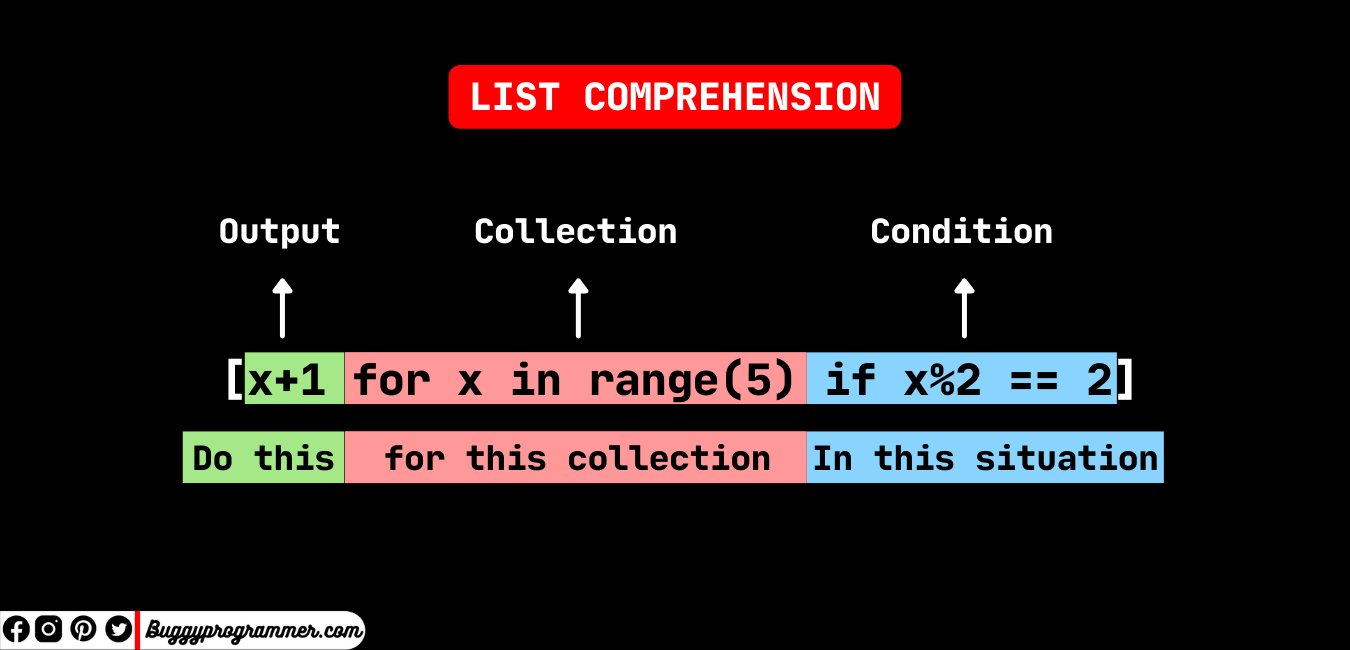

In [ ]:
the_list = []

for x in range(10):
    the_list.append(1 if x % 2 == 0 else 0)

print(the_list)

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0]


# **Benefits of List Comprehension**
Apart from being simple, compact, and faster, list comprehension is also reliable in many different situations. And you can use it in a variety of circumstances.

You can use list comprehension to map and filter in addition to basic list generation. You don't need to adopt a new strategy for each situation. That’s one of the reasons it is considered more pythonic than a for loop.

# **List comprehensions vs. generators**

It's the parentheses. The brackets make a comprehension, the parentheses make a generator.

In [ ]:
the_list = [1 if x % 2 == 0 else 0 for x in range(10)]
the_generator = (1 if x % 2 == 0 else 0 for x in range(10))

for v in the_list:
    print(v, end=" ")
print()

for v in the_generator:
    print(v, end=" ")
print()



1 0 1 0 1 0 1 0 1 0 
1 0 1 0 1 0 1 0 1 0 


How can you know that the second assignment creates a generator, not a list?

There is some proof we can show you. Apply the len() function to both these entities.

In [ ]:
len(the_list)
len(the_generator)

TypeError: object of type 'generator' has no len()

# **LAB**
# **Processing Collections in Python Using Lambdas**
**Introduction**

Being able to perform actions on a collection is incredibly useful in any type of programming, and it is pretty common to need to perform a single action on each item. We could do this by using a loop, but there are built-in collection functions that can take a collection and a function or lambda to run each item through. In this hands-on lab, we utilize higher-order functions to process some existing lists by using lambdas.

The map, filter, sorted, and reversed functions are great examples of higher-order functions that can receive a function (or lambda) as an argument and do things accordingly. In this hands-on lab, we're going to leverage these functions and lambdas to process some pre-created lists within the collection_processing.py script.



**1-Create the sorted_by_name List by Sorting the people List of Dictionaries**

In [ ]:
# 1) Sort the `people` list of dictionaries alphabetically based on the
# 'name' key from each dictionary using the `sorted` function and store
# the new list as `sorted_by_name`

people = [
    {"name": "Kevin Bacon", "age": 61},
    {"name": "Fred Ward", "age": 77},
    {"name": "finn Carter", "age": 59},
    {"name": "Ariana Richards", "age": 40},
    {"name": "Victor Wong", "age": 74},
]

sorted_by_name = sorted(people, key=lambda d: d['name'].lower())


print(sorted_by_name)

[{'name': 'Ariana Richards', 'age': 40}, {'name': 'finn Carter', 'age': 59}, {'name': 'Fred Ward', 'age': 77}, {'name': 'Kevin Bacon', 'age': 61}, {'name': 'Victor Wong', 'age': 74}]


In [ ]:
assert sorted_by_name == [
    {"name": "Ariana Richards", "age": 40},
    {"name": "finn Carter", "age": 59},
    {"name": "Fred Ward", "age": 77},
    {"name": "Kevin Bacon", "age": 61},
    {"name": "Victor Wong", "age": 74},
], f"Expected sorted_by_name to equal '{sorted_by_name}' to equal '{[{'name': 'Ariana Richards', 'age': 40},{'name': 'finn Carter', 'age': 59}, {'name': 'Fred Ward', 'age': 77}, {'name': 'Kevin Bacon', 'age': 61}, {'name': 'Victor Wong', 'age': 74}]}''"
print(sorted_by_name)

[{'name': 'Ariana Richards', 'age': 40}, {'name': 'finn Carter', 'age': 59}, {'name': 'Fred Ward', 'age': 77}, {'name': 'Kevin Bacon', 'age': 61}, {'name': 'Victor Wong', 'age': 74}]


 **2-Create the name_declarations List by Mapping over sorted_by_name**

In [ ]:
# 2) Use the `map` function to iterate over `sorted_by_name` to generate a
# new list called `name_declarations` where each value is a string with
# `<NAME> is <AGE> years old.` where the `<NAME>` and `<AGE>` values are from
# the dictionaries.

name_declarations = list(
    map(lambda d: f"{d['name']} is {d['age']} years old", sorted_by_name)
)

assert name_declarations == [
    "Ariana Richards is 40 years old",
    "finn Carter is 59 years old",
    "Fred Ward is 77 years old",
    "Kevin Bacon is 61 years old",
    "Victor Wong is 74 years old",
], f"Expected name_declarations to equal '{name_declarations}' to equal '{['Ariana Richards is 40 years old', 'finn Carter is 59 years old', 'Fred Ward is 77 years old', 'Kevin Bacon is 61 years old', 'Victor Wong is 74 years old']}'"
print(name_declarations)

['Ariana Richards is 40 years old', 'finn Carter is 59 years old', 'Fred Ward is 77 years old', 'Kevin Bacon is 61 years old', 'Victor Wong is 74 years old']


**3-Create the under_seventy List by Filtering and Sorting on the sorted_by_name List**

In [ ]:
# 3) Combine the `filter` and `sorted` functions to iterate over `sorted_by_name` to generate a
# new list called `under_seventy` that only contains the dictionaries where the
# 'age' key is less than 70, sorting the list by age.

under_seventy = sorted(
    filter(lambda d: d['age'] < 70, sorted_by_name), key=lambda d: d['age']
)

assert under_seventy == [
    {"name": "Ariana Richards", "age": 40},
    {"name": "finn Carter", "age": 59},
    {"name": "Kevin Bacon", "age": 61},
], f"Expected under_seventy to equal '{under_seventy}' to equal '{[{'name': 'Ariana Richards', 'age': 40}, {'name': 'finn Carter', 'age': 59}, {'name': 'Kevin Bacon', 'age': 61}]}'"
print(under_seventy)

[{'name': 'Ariana Richards', 'age': 40}, {'name': 'finn Carter', 'age': 59}, {'name': 'Kevin Bacon', 'age': 61}]
